In this notebook, I train a MLP to classify digit images from MNIST dataset

In [71]:
'''
load dataset
'''
#use pre-shuffled dataset that already stored in Keras
from keras.datasets import mnist
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

print("MNIST dataset has a {} set of training examples.".format(len(XTrain)))
print("MNIST dataset has a {} set of test examples.".format(len(XTest)))

MNIST dataset has a 60000 set of training examples.
MNIST dataset has a 10000 set of test examples.


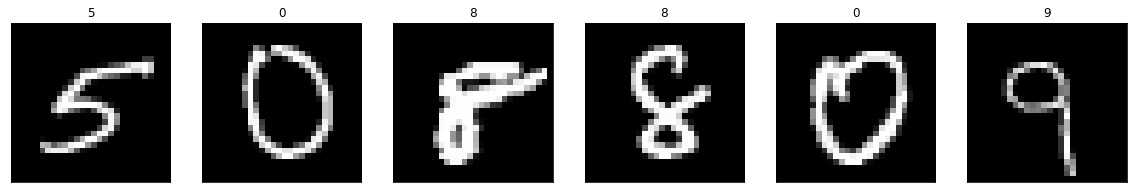

In [72]:
'''
visualize the first six random training images
'''
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm #cmap
import numpy as np
import random

#plot first six training images
fig = plt.figure(figsize = (20, 20))
for i in range(6):
    randomChoice = random.randint(0, len(XTrain))
    ax           = fig.add_subplot(1, 6, i + 1, xticks = [], yticks = [])
    ax.imshow(XTrain[randomChoice], cmap = 'gray')
    ax.set_title(str(yTrain[randomChoice]))



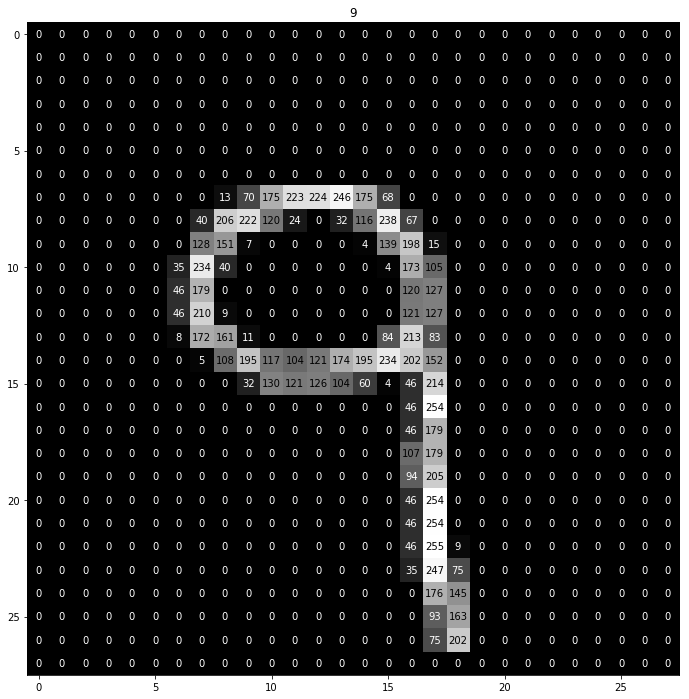

In [73]:
'''
view an image in more detail
'''
def visualizeInput(img, ax):
    ax.imshow(img, cmap = 'gray')
    width, height = img.shape #get image size
    threshold     = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy = (y, x), 
                       horizontalalignment = 'center', 
                       verticalalignment   = 'center', 
                       color = 'white' if img[x][y] < threshold else 'black')

fig = plt.figure(figsize = (12, 12))
ax  = fig.add_subplot(111)
ax.set_title(str(yTrain[randomChoice]))
visualizeInput(XTrain[randomChoice], ax)
            

In [74]:
'''
rescale the iamges by diving every pixel in every image by 255
this is normalize feature
'''
#rescale [0:255] -> [0:1]
XTrain = XTrain.astype('float32') / 255
XTest  = XTest.astype('float32') / 255

In [75]:
'''
encode categorical integer using a one hot scheme
'''
from keras.utils import np_utils
#print first 10 training labels
print('integer valued labels')
print(yTrain[0 : 10])

#one-hot encode the labels both for training and test
yTrain = np_utils.to_categorical(yTrain, 10)
yTest  = np_utils.to_categorical(yTest, 10)

#print the one-hot encode for randomSamples
print('one-hot labels:')
print(yTrain[0 : 10])

integer valued labels
[5 0 4 1 9 2 1 3 1 4]
one-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [76]:
'''
define the model architecture
'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#define the model
model = Sequential()
model.add(Flatten(input_shape = XTrain.shape[1 : ])) #flatten the input image as input layer
model.add(Dense(512, activation = 'relu')) #hiddenLayer1 with 512 nodes
model.add(Dropout(0.2)) #Dropout optimizatin approach with 0.2 probability
model.add(Dense(512, activation = 'relu')) #hiddenLayer2 with 512 nodes
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) #outputLayer using one-hot encoding

#summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [77]:
'''
compile the model
'''
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [78]:
'''
calculate the classification accuarcy on the test set before training
'''
score     = model.evaluate(XTest, yTest, verbose = 0)
accuracy  = 100 * score[1] 

In [79]:
'''
train the model
checkpointer to monitor classification task progress
'''
from keras.callbacks import ModelCheckpoint
#train the model, with provided pre-trined model file in the directory
checkpointer = ModelCheckpoint(filepath = 'mnist.model.best.hdf5', 
                              verbose = 1, save_best_only = True)
hist = model.fit(XTrain, yTrain, batch_size = 128, epochs = 10, 
                validation_split = 0.2, callbacks = [checkpointer], 
                verbose = 1, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 328us/step - loss: 0.2757 - acc: 0.9155 - val_loss: 0.1201 - val_acc: 0.9637
Epoch 2/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.1103 - acc: 0.9661 - val_loss: 0.0946 - val_acc: 0.9719
Epoch 3/10
48000/48000 [==============================] - 15s 306us/step - loss: 0.0800 - acc: 0.9765 - val_loss: 0.0945 - val_acc: 0.9727
Epoch 4/10
48000/48000 [==============================] - 15s 308us/step - loss: 0.0642 - acc: 0.9806 - val_loss: 0.0894 - val_acc: 0.9762
Epoch 5/10
48000/48000 [==============================] - 15s 307us/step - loss: 0.0513 - acc: 0.9842 - val_loss: 0.0857 - val_acc: 0.9773
Epoch 6/10
48000/48000 [==============================] - 15s 304us/step - loss: 0.0439 - acc: 0.9859 - val_loss: 0.1136 - val_acc: 0.9733
Epoch 7/10
48000/48000 [==============================] - 14s 301us/step - loss: 0.0375 - acc: 0.9886 - val_loss: 0.

In [80]:
'''
load the weights from pre-trained model provided
'''
model.load_weights('mnist.model.best.hdf5')

In [81]:
'''
calculate the accuracy
'''
score = model.evaluate(XTest, yTest, verbose = 0)
accuracy = 100 * score[1]

#print the accuracy
print("Test accuracy: {}".format(accuracy))

Test accuracy: 97.81
